# Fake News Detection Proble

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv") 

In [3]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [5]:
df_fake["class"] = 0
df_true["class"] = 1

In [6]:
df_fake.shape , df_true.shape

((23481, 5), (21417, 5))

## marge dataset

In [7]:
df_Merge = pd.concat([df_fake,df_true] , axis = 0)
df_Merge.to_csv("Manual_testing.csv")

In [8]:
df_Merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [9]:
df_Merge.shape

(44898, 5)

In [10]:
df = df_Merge.drop(["text","subject","date"], axis = 1)
df.head(5)

,title,class
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0


### Spliting the dataset for training and testing

In [11]:
X_train , X_test , y_train , y_test = train_test_split(df['title'] , df['class'], test_size = 0.2 , random_state = 42)

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
x_test_vectorized = vectorizer.transform(X_test)

### Visualising the distribution of the dataset

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 100)
word_freq = vectorizer.fit_transform(df_Merge['title'])
word_freq = word_freq.sum(axis = 0 ).A1
words = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame(zip(words,word_freq) , columns = ['word' , 'frequency'])
word_freq_df = word_freq_df.sort_values(by = 'frequency' , ascending = False)

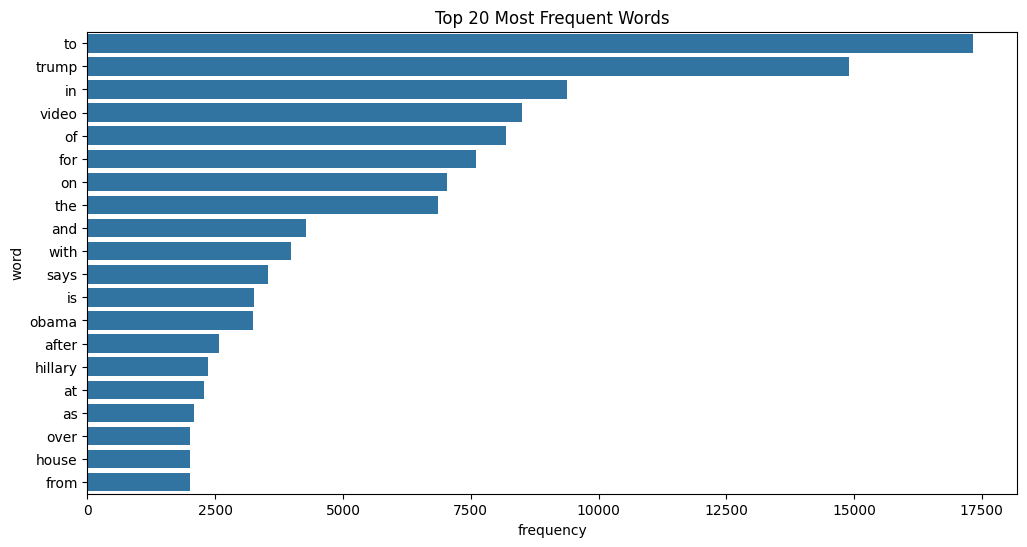

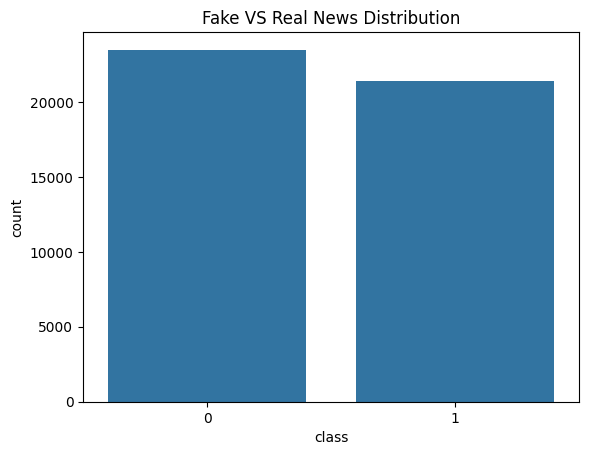

In [13]:
plt.figure(figsize = (12, 6))
sns.barplot(x='frequency' , y='word' , data=word_freq_df.head(20))
plt.title('Top 20 Most Frequent Words')
plt.show()

#Class Distribution : Fake VS Real News
sns.countplot(x ='class' , data = df_Merge)
plt.title('Fake VS Real News Distribution')
plt.show()

### Building the Naive bias Model

In [14]:
model_nb = MultinomialNB()
model_nb.fit(X_train_vectorized, y_train)

MultinomialNB()

In [15]:
y_pred = model_nb.predict(x_test_vectorized)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4733
           1       0.96      0.91      0.94      4247

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

[[4568  165]
 [ 364 3883]]


### Linear Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_vectorized , y_train)

y_pred = log_reg.predict(x_test_vectorized)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4733
           1       0.94      0.96      0.95      4247

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980

[[4472  261]
 [ 181 4066]]


### Random Forset Model

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100 , random_state = 42)
rf.fit(X_train_vectorized,y_train)

y_pred =  rf.predict(x_test_vectorized)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4733
           1       0.94      0.96      0.95      4247

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980

[[4477  256]
 [ 162 4085]]


### Model Evaluation

Accuracy:  0.9534521158129176
Precisoin:  0.9410274130384704
Recall:   0.9618554273604898
F1-Score:   0.9513274336283186


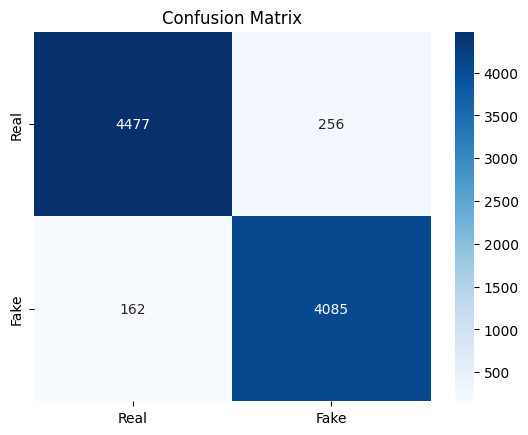

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precisoin: ",precision_score(y_test, y_pred))
print("Recall:  ",recall_score(y_test, y_pred))
print("F1-Score:  ",f1_score(y_test, y_pred))

cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot = True, fmt = "d" , cmap ="Blues" , xticklabels= ["Real","Fake"], yticklabels=["Real","Fake"])
plt.title("Confusion Matrix")
plt.show()

### Model Interpretation

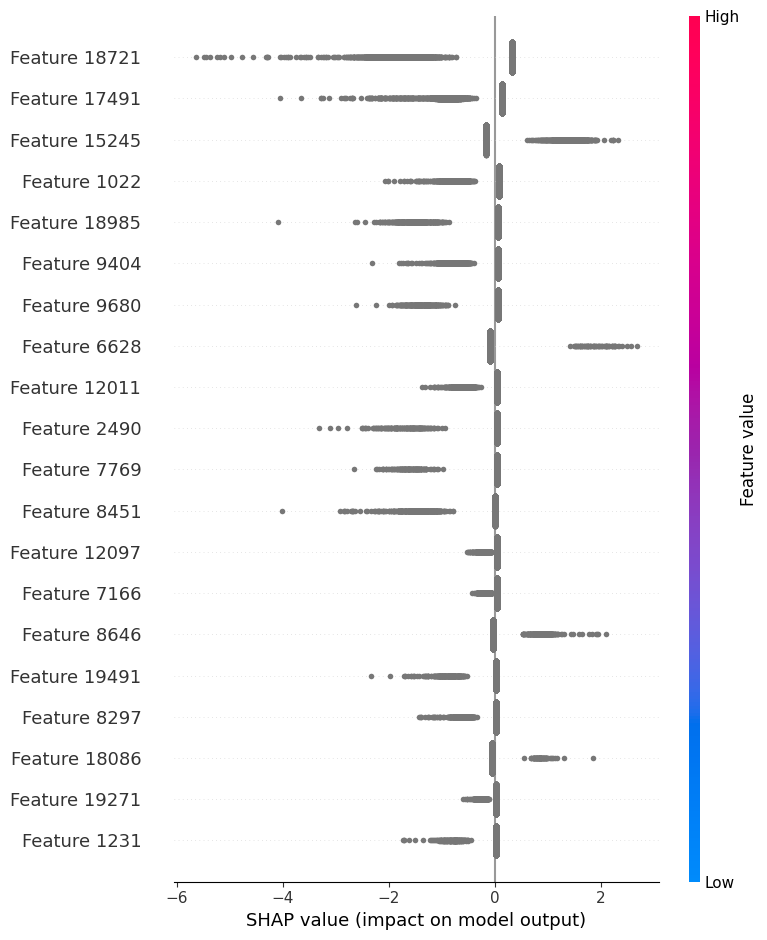

In [20]:
import shap
import numpy
explainer = shap.Explainer(log_reg ,x_test_vectorized)
shap_values = explainer.shap_values(x_test_vectorized)

shap.summary_plot(shap_values,x_test_vectorized)